# Landslide Hazard Analysis Using SAR
Intro to the use case/methods used

Search for SLC images over Haiti in a defined time period

In [23]:
import os
from datetime import datetime

# start_time = datetime.strptime('2021-05-01T23:59', '%Y-%m-%dT%H:%M')
start_time = datetime.strptime('2020-08-01T23:59', '%Y-%m-%dT%H:%M')
end_time = datetime.strptime('2021-08-16T23:59', '%Y-%m-%dT%H:%M')
event_time = datetime.strptime('2021-08-14T00:00', '%Y-%m-%dT%H:%M')

import asf_search
scenes_to_submit = []
wkt = 'POLYGON((-74.6 18.0,-73.0 18.0,-73.0 18.8,-74.6 18.8, -74.6 18.0))'
results_descending = asf_search.geo_search(platform=[asf_search.PLATFORM.SENTINEL1], intersectsWith=wkt, processingLevel='SLC', start=start_time, end=end_time, relativeOrbit=142, frame=530)
# [scenes_to_submit.append(result.properties['sceneName']) for result in results]
# print(f'There are {len(scenes_to_submit)} scenes in the AOI between {start_time} and {end_time}')

Request HyP3 processing of Haiti data for two years

In [24]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import shape

properties = [result.geojson()['properties'] for result in results_descending]
geometries = [shape(result.geojson()['geometry']) for result in results_descending]
gdf = gpd.GeoDataFrame(properties, geometry=geometries,crs='EPSG:4326')
scenes_to_submit = list(gdf['sceneName'])
print(gdf.shape[0])

32


In [26]:
gdf.explore(style_kwds=dict(color='black', fill=False))

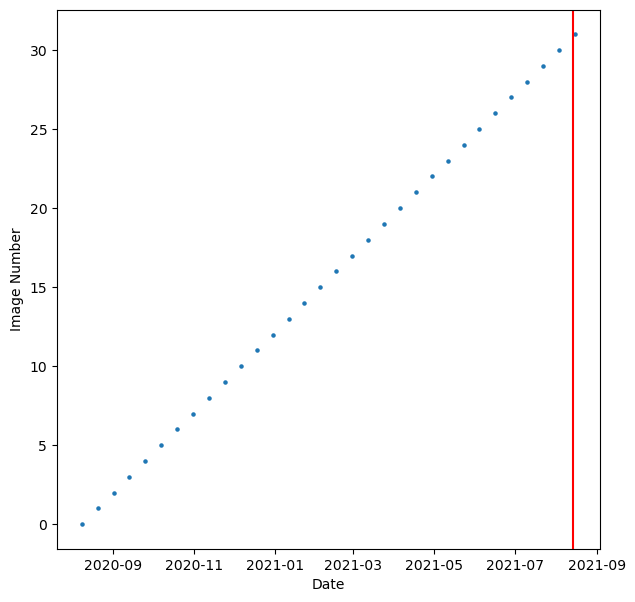

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_gdf = gdf[['sceneName', 'startTime']].copy()
plot_gdf['startTime'] = pd.to_datetime(plot_gdf['startTime'])
plot_gdf = plot_gdf.sort_values('startTime').reset_index()

f, ax = plt.subplots(1,1,figsize=(7,7))
ax.scatter(pd.to_datetime(plot_gdf['startTime']), plot_gdf.index, s=5)
ax.set(xlabel='Date', ylabel='Image Number')
ax.axvline(event_time, color='red')

In [59]:
import hyp3_sdk as sdk

print(f'Submitting {len(scenes_to_submit)} jobs')
hyp3 = sdk.HyP3()
rtc_jobs = sdk.Batch()
for scene in scenes_to_submit:
    rtc_jobs += hyp3.submit_rtc_job(granule=scene, name='IGARSS-HAITI')

Submitting 32 jobs


In [90]:
data_dir_path = 'haiti_rtcs'
rtc_jobs = hyp3.watch(rtc_jobs)
succeeded_jobs = rtc_jobs.filter_jobs(succeeded=True, running=False, failed=False)
file_list = succeeded_jobs.download_files(location=data_dir_path)

  0%|          | 0/32 [timeout in 10800 s]

  0%|          | 0/32 [00:00<?, ?it/s]

S1A_IW_20210815T104736_DVP_RTC30_G_gpuned_C14A.zip:   0%|          | 0/438425490 [00:00<?, ?it/s]

S1A_IW_20210803T104735_DVP_RTC30_G_gpuned_35CB.zip:   0%|          | 0/435932532 [00:00<?, ?it/s]

S1A_IW_20210722T104735_DVP_RTC30_G_gpuned_F829.zip:   0%|          | 0/437122164 [00:00<?, ?it/s]

S1A_IW_20210710T104734_DVP_RTC30_G_gpuned_A76C.zip:   0%|          | 0/435618240 [00:00<?, ?it/s]

S1A_IW_20210628T104733_DVP_RTC30_G_gpuned_D8DA.zip:   0%|          | 0/435627282 [00:00<?, ?it/s]

S1A_IW_20210616T104733_DVP_RTC30_G_gpuned_9118.zip:   0%|          | 0/436755770 [00:00<?, ?it/s]

S1A_IW_20210604T104732_DVP_RTC30_G_gpuned_04ED.zip:   0%|          | 0/436362667 [00:00<?, ?it/s]

S1A_IW_20210523T104731_DVP_RTC30_G_gpuned_8C65.zip:   0%|          | 0/436019608 [00:00<?, ?it/s]

S1A_IW_20210511T104730_DVP_RTC30_G_gpuned_F051.zip:   0%|          | 0/436896372 [00:00<?, ?it/s]

S1A_IW_20210429T104730_DVP_RTC30_G_gpuned_D864.zip:   0%|          | 0/436807060 [00:00<?, ?it/s]

S1A_IW_20210417T104729_DVP_RTC30_G_gpuned_061E.zip:   0%|          | 0/437638129 [00:00<?, ?it/s]

S1A_IW_20210405T104729_DVP_RTC30_G_gpuned_7B5D.zip:   0%|          | 0/436386991 [00:00<?, ?it/s]

S1A_IW_20210324T104729_DVP_RTC30_G_gpuned_6614.zip:   0%|          | 0/437227610 [00:00<?, ?it/s]

S1A_IW_20210312T104728_DVP_RTC30_G_gpuned_7B1B.zip:   0%|          | 0/435142752 [00:00<?, ?it/s]

S1A_IW_20210228T104728_DVP_RTC30_G_gpuned_ADC6.zip:   0%|          | 0/437967025 [00:00<?, ?it/s]

S1A_IW_20210216T104728_DVP_RTC30_G_gpuned_9679.zip:   0%|          | 0/437096582 [00:00<?, ?it/s]

S1A_IW_20210204T104729_DVP_RTC30_G_gpuned_50F2.zip:   0%|          | 0/434582360 [00:00<?, ?it/s]

S1A_IW_20210123T104729_DVP_RTC30_G_gpuned_6B30.zip:   0%|          | 0/436786488 [00:00<?, ?it/s]

S1A_IW_20210111T104730_DVP_RTC30_G_gpuned_2A3D.zip:   0%|          | 0/436293612 [00:00<?, ?it/s]

S1A_IW_20201230T104730_DVP_RTC30_G_gpuned_439B.zip:   0%|          | 0/435660595 [00:00<?, ?it/s]

S1A_IW_20201218T104731_DVP_RTC30_G_gpuned_9455.zip:   0%|          | 0/435617966 [00:00<?, ?it/s]

S1A_IW_20201206T104731_DVP_RTC30_G_gpuned_C9DF.zip:   0%|          | 0/436550682 [00:00<?, ?it/s]

S1A_IW_20201124T104732_DVP_RTC30_G_gpuned_5DD3.zip:   0%|          | 0/433650771 [00:00<?, ?it/s]

S1A_IW_20201112T104732_DVP_RTC30_G_gpuned_A6DF.zip:   0%|          | 0/436421433 [00:00<?, ?it/s]

S1A_IW_20201031T104732_DVP_RTC30_G_gpuned_B640.zip:   0%|          | 0/436645964 [00:00<?, ?it/s]

S1A_IW_20201019T104732_DVP_RTC30_G_gpuned_F8A5.zip:   0%|          | 0/435381411 [00:00<?, ?it/s]

S1A_IW_20201007T104732_DVP_RTC30_G_gpuned_4E82.zip:   0%|          | 0/435735822 [00:00<?, ?it/s]

S1A_IW_20200925T104732_DVP_RTC30_G_gpuned_78F9.zip:   0%|          | 0/436163380 [00:00<?, ?it/s]

S1A_IW_20200913T104732_DVP_RTC30_G_gpuned_EA5C.zip:   0%|          | 0/435706379 [00:00<?, ?it/s]

S1A_IW_20200901T104731_DVP_RTC30_G_gpuned_A383.zip:   0%|          | 0/436125198 [00:00<?, ?it/s]

S1A_IW_20200820T104730_DVP_RTC30_G_gpuned_E65B.zip:   0%|          | 0/435734925 [00:00<?, ?it/s]

S1A_IW_20200808T104730_DVP_RTC30_G_gpuned_A95B.zip:   0%|          | 0/436469375 [00:00<?, ?it/s]

In [91]:
import hyp3_sdk as sdk
from pathlib import Path

files = Path('haiti_rtcs').glob('*')
for file in files:
    sdk.util.extract_zipped_product(file, delete=False)

Crop all images to same extent (e.g. InSAR Notebook)

In [1]:
from pathlib import Path
from typing import List, Union
from osgeo import gdal


def get_common_overlap(file_list: List[Union[str, Path]]) -> List[float]:
    """Get the common overlap of  a list of GeoTIFF files
    
    Arg:
        file_list: a list of GeoTIFF files
    
    Returns:
         [ulx, uly, lrx, lry], the upper-left x, upper-left y, lower-right x, and lower-right y
         corner coordinates of the common overlap
    """
    
    corners = [gdal.Info(str(dem), format='json')['cornerCoordinates'] for dem in file_list]

    ulx = max(corner['upperLeft'][0] for corner in corners)
    uly = min(corner['upperLeft'][1] for corner in corners)
    lrx = min(corner['lowerRight'][0] for corner in corners)
    lry = max(corner['lowerRight'][1] for corner in corners)
    return [ulx, uly, lrx, lry]

In [21]:
from pathlib import Path
from typing import List, Union

def clip_hyp3_products_to_common_overlap(data_dir: Union[str, Path], overlap: List[float]) -> None:
    """Clip all GeoTIFF files to their common overlap
    
    Args:
        data_dir:
            directory containing the GeoTIFF files to clip
        overlap:
            a list of the upper-left x, upper-left y, lower-right-x, and lower-tight y
            corner coordinates of the common overlap
    Returns: None
    """

    
    files_for_mintpy = ['_VV.tif', '_VH.tif']

    for extension in files_for_mintpy:

        for file in data_dir.rglob(f'*{extension}'):

            dst_file = file.parent / f'{file.stem}_clipped{file.suffix}'

            gdal.Translate(destName=str(dst_file), srcDS=str(file), projWin=overlap)

In [22]:
data_dir = Path('haiti_rtcs')
files = list(data_dir.glob('**/*_VV.tif'))
overlap = get_common_overlap(files)
clip_hyp3_products_to_common_overlap(data_dir, overlap)

Load the geotiffs into Xarray with datetime stamps for each image

In [ ]:
def extract_tif_names(scene_dir_path):
    scene_path_listed = os.listdir(scene_dir_path)
    scene_files_vv = [fname for fname in scene_path_listed if fname.endswith('_VV_clipped.tif')]
    return scene_files_vv

scenes_listed = os.listdir(data_dir_path)
fpaths_vv = []

for element in range(len(scenes_listed)):
    print(f'{data_dir_path}/{scenes_listed[element]}')
    try:
        good_files = extract_tif_names(f'{data_dir_path}/{scenes_listed[element]}')
        fpaths_vv.append(f'{data_dir_path}/{scenes_listed[element]}/{good_files[0]}')
    except:
        print(f'Couldnt use {scenes_listed[element]}. Skipping.')
        continue

Pre-temporal averaging, create time series plot of single pixel (or group of pixels)

In [ ]:
import xarray as xr

def preprocess(da_orig, file_type: str='vv'):
    '''function that should return an xarray object with time dimension and associated metadata given a path to a single RTC scene, if its dualpol will have multiple bands, currently just as 2 data arrays but could merge.
    goal would be to apply this a list of directories for different RTC products, return cube along time dimension - I think?
    - for concatenating, would need to check footprints and only take products with the same footprint, or subset them all to a common AOI? '''
    da = da_orig.copy()
    da = da.rename({'band_data': file_type}).squeeze()
    fname = os.path.basename(da_orig['band_data'].encoding['source'])
    date = datetime.strptime(fname[7:22], '%Y%m%dT%H%M%S')
    da = da.assign_coords({'acq_date': date})
    da = da.expand_dims('acq_date')
    da = da.drop_duplicates(dim=['x', 'y'])

    return da


vv = xr.open_mfdataset(paths = fpaths_vv, preprocess = preprocess, chunks = 'auto', engine='rasterio', data_vars='minimal', coords='minimal', concat_dim='acq_date', combine='nested', parallel=True)

Create a temporal average for both pre and post EQ

In [ ]:
import numpy as np

date_bins = [start_time, event_time, end_time]
date_bin_labels = ["preevent", "postevent"]

vv = vv.groupby_bins("acq_date", date_bins, labels=date_bin_labels)
mean_vv = vv.mean(dim='acq_date')

Perform a log difference of the two resulting images.

In [ ]:
log_diff = 10*np.log10(mean_vv['vv'][0]/mean_vv['vv'][1])

import matplotlib.pyplot as plt

plt.matshow(log_diff)
plt.colorbar()
plt.show()

Discuss options for thresholding the difference image

Use the COP30 DEM to remove change detections in areas with slopes <5 degrees use gdaldem

In [ ]:
from dem_stitcher import stitch_dem


dem_file = data_dir_path / 'DEM.tif'
bounds = [-74.6, 18.0, -73.0, 18.8]
X, p = stitch_dem(bounds,
                  dem_name='glo_30',  # Global Copernicus 30 meter resolution DEM
                  dst_ellipsoidal_height=False,
                  dst_area_or_point='Point')

import rasterio

with rasterio.open(dem_file, 'w', **p) as ds:
   ds.write(X, 1)
   ds.update_tags(AREA_OR_POINT='Point')

process_dem_file = data_dir_path / 'DEM_processed.tif'
gdal.DEMProcessing(destName=str(process_dem_file), srcDS=str(dem_file), processing="slope", format="Gtiff", slopeFormat="degree")

height, width = np.shape(log_diff)
gdal.Warp(str(process_dem_file), str(process_dem_file), dstSRS='EPSG:4326',
                  outputBounds=bounds, width=width, height=height, resampleAlg='nearest', format='GTiff')

dem = gdal.Open(str(process_dem_file), gdal.GA_ReadOnly).ReadAsArray()
dem_mask = dem > 5

log_diff = log_diff.where(dem_mask)

 Plot a histogram for the difference image (might have to subset histogram source to area with equal amounts of landslides and non-landslides).

In [ ]:
import matplotlib.pyplot as plt

plt.hist(log_diff)
plt.show()

Create a figure to interactively view the data and set a threshold using matplotlib

In [ ]:
plt.matshow(log_diff.where(dem_mask))
plt.show()